In [1]:
import os
main_path = os.path.abspath(os.path.join(os.path.dirname("./quantity_search.ipynb"), '..'))
import sys
sys.path.insert(0, main_path)

import numpy as np
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt
import json
plt.style.use('seaborn')

folder = os.path.join(main_path, "data", "quantity_search")

In [2]:
def sort_quantities_by_acc(df):
    quantities = np.unique(df["quantity"])
    Q = []
    acc = []
    wl = []
    win = []
    for q in quantities:
        df_i = df[df["quantity"] == q]
        acc_i = df_i["cv_mean"].to_numpy()
        wl_i = df_i["wl"].to_numpy()
        win_i = df_i["win"].to_numpy()
        
        idx = np.argmax(acc_i)
        
        acc.append(float(acc_i[idx]))
        wl.append(int(wl_i[idx]))
        win.append(float(win_i[idx]))
        Q.append(str(q))
        
    return Q, acc, wl, win

def add_count_Qs(df):
    df["count_Qs"] = [len(x.split("-")) for x in df["quantity"]]
    return df
    
def comb_filter_only_bests(df, n_max):
    df2 = df[df["count_Qs"] == 2]
    cv_mean = df2["cv_mean"].to_numpy()
    highest_idx = np.argmax(cv_mean)
    line = df2.iloc[highest_idx]
    df_filter = ((df["count_Qs"] == 2) & (df2["quantity"] == line.quantity))
    for i in range(3,n_max):
        df2 = df[df["count_Qs"] == i]
        cv_mean = df2["cv_mean"].to_numpy()
        highest_idx = np.argmax(cv_mean)
        line = df2.iloc[highest_idx]
        df_filter |= ((df["count_Qs"] == i) & (df2["quantity"] == line.quantity))
    
    return df[df_filter]

def concat_single_best(df1, df2):
    cv_mean = df1["cv_mean"].to_numpy()
    highest_idx = np.argmax(cv_mean)
    highest_Q = df1.iloc[highest_idx].quantity
    df3 = df1[df1["quantity"] == highest_Q]
    return pd.concat([df3, df2])

## Single-Q results

In [3]:
filename = "single_quantity_lsa_20210903-044949"
df_single_q = pd.read_csv(os.path.join(folder, filename), index_col=None)
df_single_q = df_single_q[df_single_q["valid_cv"]]
add_count_Qs(df_single_q)
frames = [df_single_q[df_single_q["quantity"]=="(Tr)"], 
          df_single_q[df_single_q["quantity"]=="(Mm)"]]
df_resume = pd.concat(frames)
df_resume = df_resume[["quantity", "win", "wl", "cv_mean"]]
df_resume.head()
all_frames = [df_single_q]

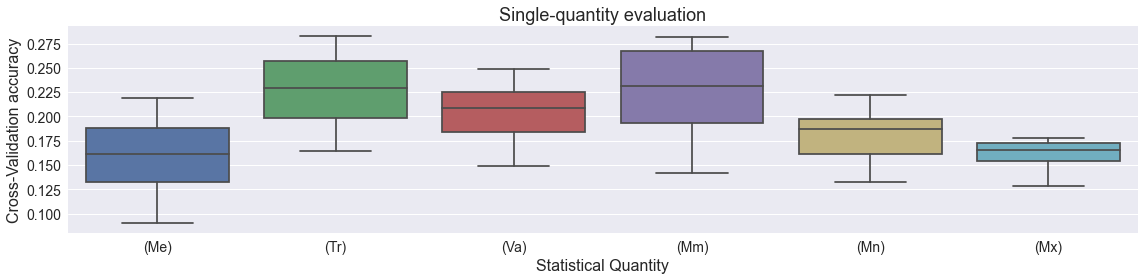

In [4]:
plt.figure(figsize=(16, 4))
b = snb.boxplot(x="quantity", y="cv_mean", data=df_single_q)
plt.ylabel("Cross-Validation accuracy", fontsize=16)
plt.xlabel("Statistical Quantity", fontsize=16)
plt.title("Single-quantity evaluation", fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.tight_layout()

plt.savefig("figs/single_q_evaluations.png", dpi=350)

## Comb Single-Q results

In [5]:
filename = "comb_single_quantity_lsa_20210903-044949"
df_comb_single_q = pd.read_csv(os.path.join(folder, filename), index_col=None)
df_comb_single_q = df_comb_single_q[df_comb_single_q["valid_cv"]]
add_count_Qs(df_comb_single_q)
df_comb_single_q2 = comb_filter_only_bests(df_comb_single_q, 6)
df_comb_single_q2 = concat_single_best(df_single_q, df_comb_single_q2)
df_comb_single_q2.head()
frame = df_comb_single_q2[df_comb_single_q2["quantity"]=="(Tr-Mm)"][["quantity", "win", "wl", "cv_mean"]]
df_resume = pd.concat([df_resume, frame])
df_resume.head()
all_frames.append(df_comb_single_q2)

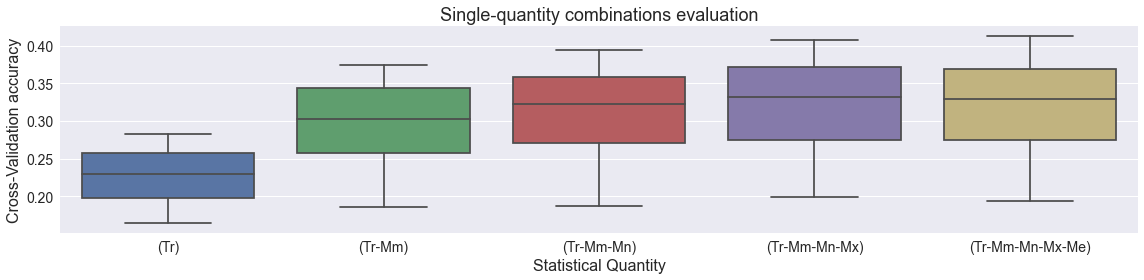

In [6]:
plt.figure(figsize=(16, 4))
b = snb.boxplot(x="quantity", y="cv_mean", data=df_comb_single_q2)
loc, labels = plt.xticks()
# plt.xticks(loc, labels, rotation = 15, ha="right", fontsize=13)
plt.ylabel("Cross-Validation accuracy", fontsize=16)
plt.xlabel("Statistical Quantity", fontsize=16)
plt.title("Single-quantity combinations evaluation", fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.tight_layout()

plt.savefig("figs/single_q_comb_evaluations.png", dpi=350)

## Double-Q results

In [7]:
filename = "double_quantity_lsa_20210903-044949"
df_double_q = pd.read_csv(os.path.join(folder, filename), index_col=None)
df_double_q = df_double_q[df_double_q["valid_cv"]]
add_count_Qs(df_double_q)
df_double_q = df_double_q[df_double_q["quantity"] != "(MmTr)"]
# df_double_q.head()

frame = df_double_q[df_double_q["quantity"]=="(TrMm)"][["quantity", "win", "wl", "cv_mean"]]
df_resume = pd.concat([df_resume, frame])
all_frames.append(df_double_q)

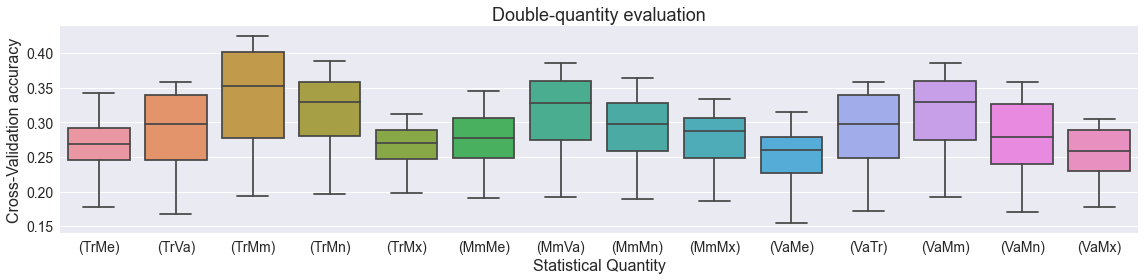

In [8]:
plt.figure(figsize=(16, 4))
b = snb.boxplot(x="quantity", y="cv_mean", data=df_double_q)
plt.ylabel("Cross-Validation accuracy", fontsize=16)
plt.xlabel("Statistical Quantity", fontsize=16)
plt.title("Double-quantity evaluation", fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.tight_layout()

plt.savefig("figs/double_q_evaluations.png", dpi=350)

## Comb Double-Q results

In [9]:
filename = "comb_double_quantity_lsa_20210904-024910"
df_comb_double_q = pd.read_csv(os.path.join(folder, filename), index_col=None)
df_comb_double_q = df_comb_double_q[df_comb_double_q["valid_cv"]]
add_count_Qs(df_comb_double_q)
df_comb_double_q2 = comb_filter_only_bests(df_comb_double_q, 6)
df_comb_double_q2 = concat_single_best(df_double_q, df_comb_double_q2)
# df_comb_double_q2.head()

frames = [df_resume,
          df_comb_double_q2[df_comb_double_q2["quantity"]=="(MmTr-MmMn)"][["quantity", "win", "wl", "cv_mean"]], 
          df_comb_double_q2[df_comb_double_q2["quantity"]=="(MmTr-MmMn-MmMx)"][["quantity", "win", "wl", "cv_mean"]], 
          df_comb_double_q2[df_comb_double_q2["quantity"]=="(MmTr-MmMn-MmMx-TrMn)"][["quantity", "win", "wl", "cv_mean"]]]
df_resume = pd.concat(frames)
all_frames.append(df_comb_double_q2)

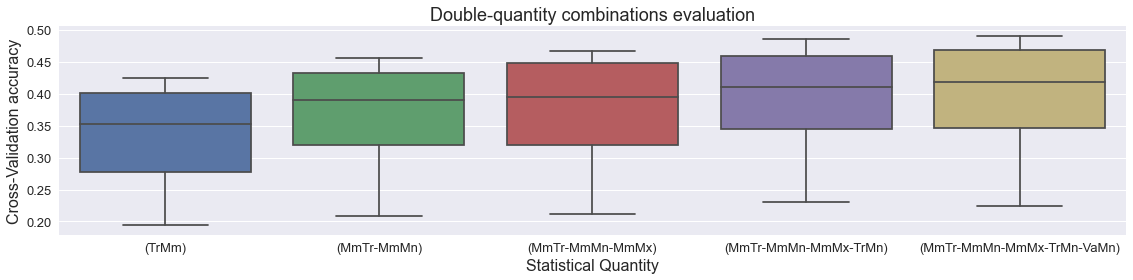

In [10]:
plt.figure(figsize=(16, 4))
b = snb.boxplot(x="quantity", y="cv_mean", data=df_comb_double_q2)
plt.ylabel("Cross-Validation accuracy", fontsize=16)
plt.xlabel("Statistical Quantity", fontsize=16)
plt.title("Double-quantity combinations evaluation", fontsize=18)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.tight_layout()

plt.savefig("figs/double_q_comb_evaluations.png", dpi=350)

## Triple-Q results

In [11]:
filename = "triple_quantity_lsa_20210904-024910"
df_triple_q = pd.read_csv(os.path.join(folder, filename), index_col=None)
df_triple_q = df_triple_q[df_triple_q["valid_cv"]]
add_count_Qs(df_triple_q)
df_triple_q = df_triple_q[df_triple_q["quantity"] != "(MmTr)"]
df_triple_q = df_triple_q.sort_values("cv_mean", ascending=False)
df_triple_q.head()
all_frames.append(df_triple_q)

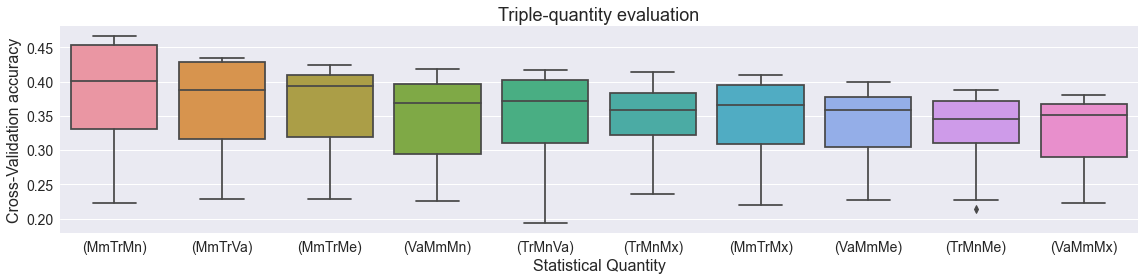

In [12]:

plt.figure(figsize=(16, 4))
b = snb.boxplot(x="quantity", y="cv_mean", data=df_triple_q)
plt.ylabel("Cross-Validation accuracy", fontsize=16)
plt.xlabel("Statistical Quantity", fontsize=16)
plt.title("Triple-quantity evaluation", fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.tight_layout()

# plt.savefig("figs/triple_q_evaluations.png", dpi=350)

## Comb Triple-Q results

In [13]:
filename = "comb_triple_quantity_lsa_20210904-024910"
df_comb_triple_q = pd.read_csv(os.path.join(folder, filename), index_col=None)
df_comb_triple_q = df_comb_triple_q[df_comb_triple_q["valid_cv"]]
add_count_Qs(df_comb_triple_q)
df_comb_triple_q2 = comb_filter_only_bests(df_comb_triple_q, 5)
df_comb_triple_q2 = concat_single_best(df_triple_q, df_comb_triple_q2)
# df_comb_triple_q2.head()
frames = [df_resume,
          df_comb_double_q2[df_comb_double_q2["quantity"]=="(MmTr-MmMn)"][["quantity", "win", "wl", "cv_mean"]], 
          df_comb_double_q2[df_comb_double_q2["quantity"]=="(MmTr-MmMn-MmMx)"][["quantity", "win", "wl", "cv_mean"]], 
          df_comb_double_q2[df_comb_double_q2["quantity"]=="(MmTr-MmMn-MmMx-TrMn)"][["quantity", "win", "wl", "cv_mean"]]]
df_resume = pd.concat(frames)
all_frames.append(df_comb_triple_q2)

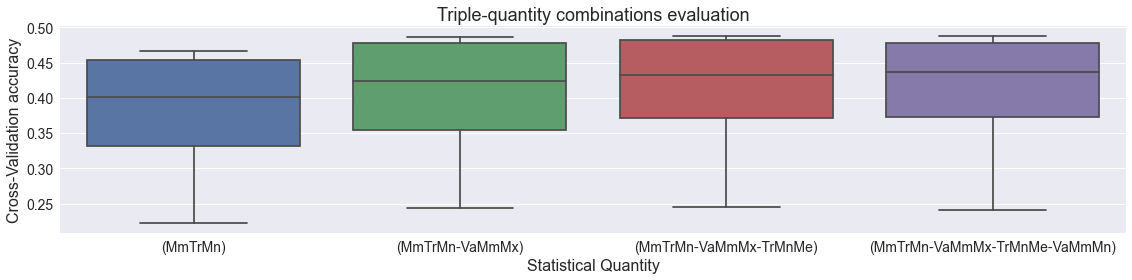

In [14]:
plt.figure(figsize=(16, 4))
b = snb.boxplot(x="quantity", y="cv_mean", data=df_comb_triple_q2)
plt.ylabel("Cross-Validation accuracy", fontsize=16)
plt.xlabel("Statistical Quantity", fontsize=16)
plt.title("Triple-quantity combinations evaluation", fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.tight_layout()

plt.savefig("figs/triple_q_comb_evaluations.png", dpi=350)

# RESUME

In [15]:
def resume_quantity_search(df1, df2, df3):
    df1 = df1.reset_index()
    df2 = df2.reset_index()
    df3 = df3.reset_index()
    
    qs1 = np.unique(df1["quantity"])
    qs2 = np.unique(df2["quantity"])
    qs3 = np.unique(df3["quantity"])
    print(qs1)
    
    idxs = []
    for q in qs1:
        df_tmp = df1[df1["quantity"] == q]
        high_idx = np.argmax(df_tmp["cv_mean"])
        idxs.append(high_idx)
    print(idxs, len(df1))
    df1_bests = df1.iloc[idxs]
    df1_bests["type"] = np.array(["Single-Q"] * len(df1_bests))
    
    idxs = []
    for q in qs2:
        high_idx = np.argmax(df2[df2["quantity"] == q]["cv_mean"])
        idxs.append(high_idx)
    df2_bests = df2.iloc[idxs]
    df2_bests["type"] = np.array(["Double-Q"] * len(df2_bests))
    
    idxs = []
    for q in qs3:
        high_idx = np.argmax(df3[df3["quantity"] == q]["cv_mean"])
        idxs.append(high_idx)
    df3_bests = df3.iloc[idxs]
    df3_bests["type"] = np.array(["Triple-Q"] * len(df3_bests))
    
    res_df = pd.concat([df1_bests, df2_bests, df3_bests])
    return res_df[["quantity", "type", "cv_mean", "cv_std", "win", "wl", "alpha", "dropped", "bopf_shape", "cv_time"]]

In [16]:
df = resume_quantity_search(df_comb_single_q2, df_comb_double_q2, df_comb_triple_q2)
df = df.sort_values("cv_mean", ascending=False)

['(Tr)' '(Tr-Mm)' '(Tr-Mm-Mn)' '(Tr-Mm-Mn-Mx)' '(Tr-Mm-Mn-Mx-Me)']
[12, 42, 79, 100, 129] 145


C:\ProgramData\Miniconda3\envs\py37\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)
C:\ProgramData\Miniconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Miniconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [17]:
df

,quantity,type,cv_mean,cv_std,win,wl,alpha,dropped,bopf_shape,cv_time
189,(MmTr-MmMn-MmMx-TrMn-VaMn),Double-Q,0.491,0.023,193.035,1,4,0,480,7.456
84,(MmTrMn-VaMmMx-TrMnMe),Triple-Q,0.488,0.033,280.116,1,4,0,814,6.971
123,(MmTrMn-VaMmMx-TrMnMe-VaMmMn),Triple-Q,0.488,0.027,489.657,1,4,0,1152,7.446
142,(MmTr-MmMn-MmMx-TrMn),Double-Q,0.486,0.019,110.428,1,4,0,384,7.044
45,(MmTrMn-VaMmMx),Triple-Q,0.486,0.026,160.245,1,4,0,718,6.684
97,(MmTr-MmMn-MmMx),Double-Q,0.468,0.020,91.671,1,4,0,288,5.755
0,(MmTrMn),Triple-Q,0.467,0.031,110.428,1,4,0,384,6.093
54,(MmTr-MmMn),Double-Q,0.456,0.026,110.428,1,4,0,192,5.098
6,(TrMm),Double-Q,0.425,0.022,91.671,1,4,0,96,4.076
129,(Tr-Mm-Mn-Mx-Me),Single-Q,0.413,0.029,710.551,2,4,0,641,7.551


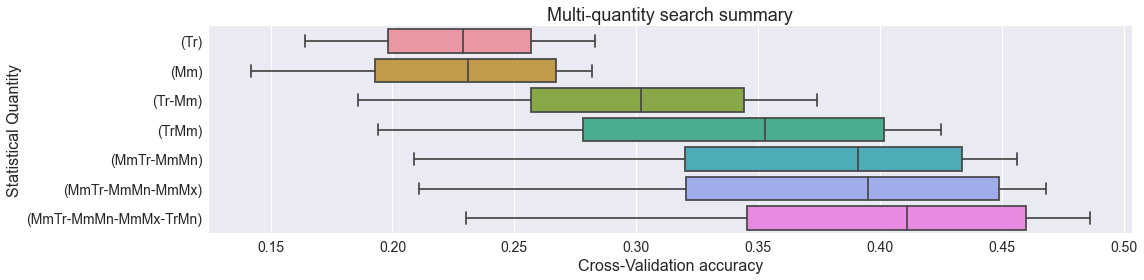

In [18]:
plt.figure(figsize=(16, 4))
b = snb.boxplot(x="cv_mean", y="quantity", data=df_resume)
plt.xlabel("Cross-Validation accuracy", fontsize=16)
plt.ylabel("Statistical Quantity", fontsize=16)
plt.title("Multi-quantity search summary", fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.tight_layout()

plt.savefig("figs/multi-quantity-search-result.png", dpi=350)

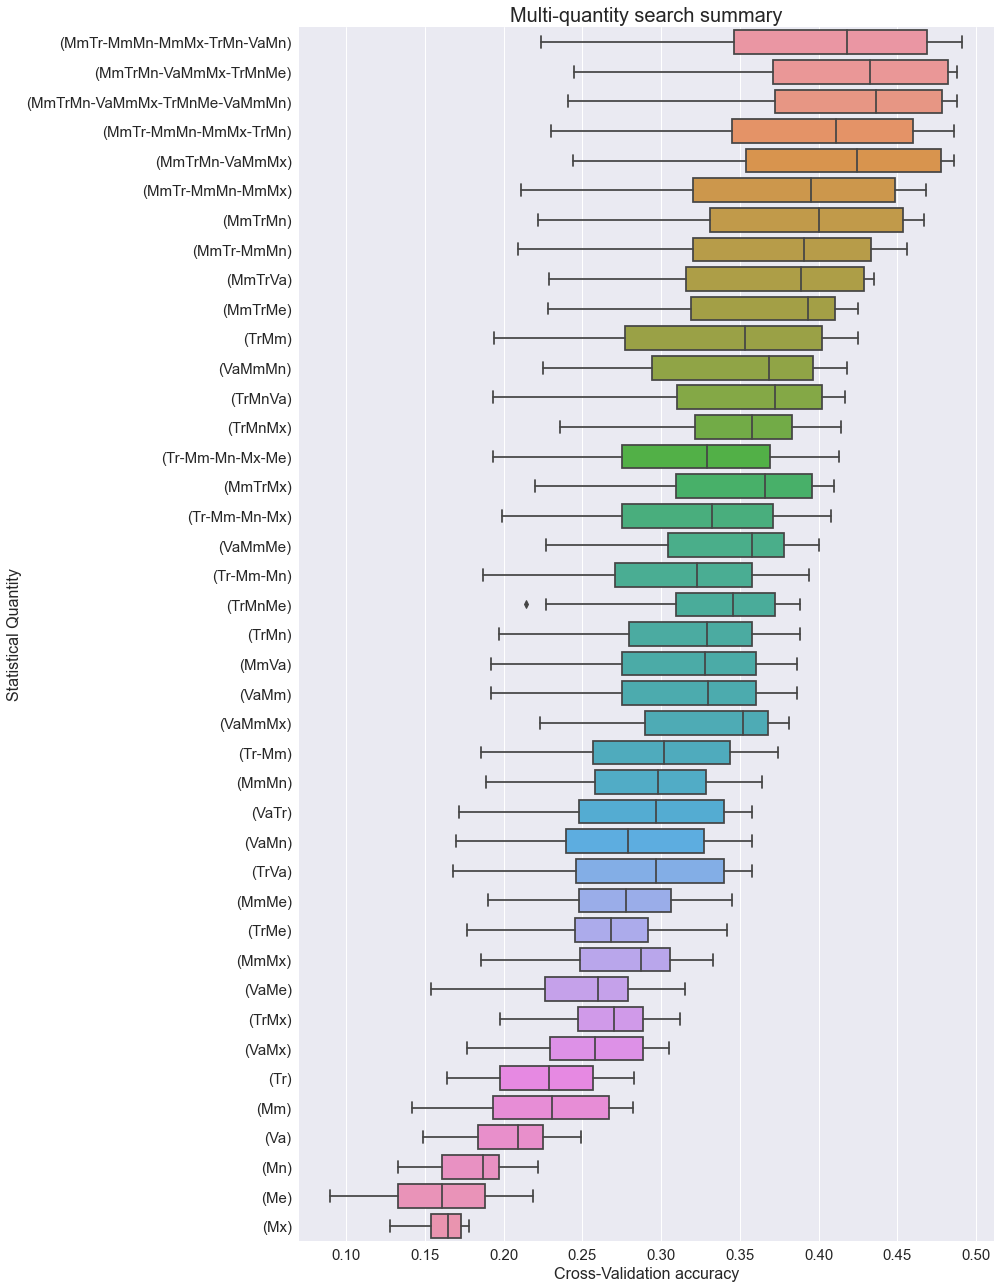

In [19]:
df_all = pd.concat(all_frames)
df_all = df_all.sort_values("cv_mean", ascending=False)
plt.figure(figsize=(14, 18))
b = snb.boxplot(x="cv_mean", y="quantity", data=df_all)
plt.xlabel("Cross-Validation accuracy", fontsize=16)
plt.ylabel("Statistical Quantity", fontsize=16)
plt.title("Multi-quantity search summary", fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.tight_layout()

plt.savefig("figs/multi-quantity-search-all-results.png", dpi=350)

# TIME COMPLEXITY BOPF METHOD

In [18]:
def time_complexity(dfs):
    dfs_arr = []
    for i, dfs_i in enumerate(dfs):
        dfs_i["n_q"] = [i+1] * len(dfs_i)
        dfs_arr.append(dfs_i)
    
    df = pd.concat(dfs_arr)
    df["features"] = [row.alpha ** (row.wl * row.n_q) for index, row in df.iterrows()]
    df["x"] = [row.wl * row.n_q for index, row in df.iterrows()]
    x = df["x"].to_numpy()
    y = df["bopf_time"].to_numpy()
    return x, y

Text(0, 0.5, 'Time (sec.)')

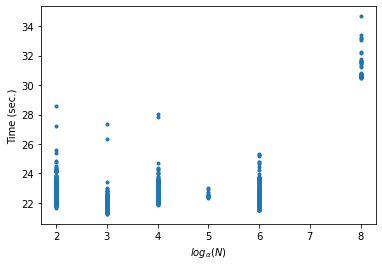

In [19]:
x, y = time_complexity([df_single_q, df_double_q, df_triple_q])
plt.plot(x, y, ".")
plt.xlabel(r"$log_{\alpha}(N)$")
plt.ylabel("Time (sec.)")